2 Exercise 1 - Implementation of Naive Bayes Algorithm

Part 1:
1. Load the dataset and preprocess the reviews.
a. Convert all text to lowercase.
b. Remove non-alphabetic characters (punctuation).
c. Tokenize the reviews and remove common stopwords.
d. Apply stemming to reduce words to their root form.
2. Split the dataset into training and testing sets (80% training, 20% testing).
3. Use a Naive Bayes classifier to classify the reviews into positive and negative categories.
a. Implement a Bag-of-Words model using CountVectorizer.
b. Train the Naive Bayes classifier using the training set.

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
nltk.download('stopwords')
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI. /IMDB Dataset.csv")   # should have 'review' and 'sentiment' columns
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-z]', ' ', text)
    tokens = text.split()
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_review'] = df['review'].apply(preprocess_text)

df['label'] = df['sentiment'].map({'positive':1, 'negative':0})

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['clean_review'], df['label'], test_size=0.2, random_state=42)

In [5]:
vectorizer = CountVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

y_pred = nb.predict(X_test_vec)

Part 2:
1. Evaluate the performance of the model using the following metrics:

Accuracy: 0.8494
Precision: 0.8549326903757284
Recall: 0.8444135741218496
F1 Score: 0.8496405750798722
ROC-AUC: 0.8494391998809208

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      4961
           1       0.85      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



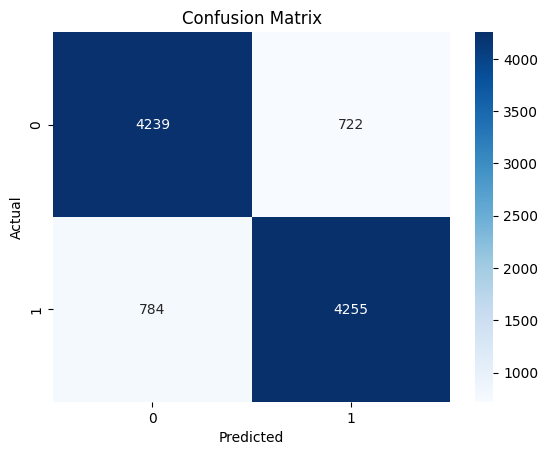

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

3 Feature Selection Exercise.

3.1 Feature Selection using Wrapper Methods.

Part 1: Data Loading and Preprocessing

In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
data = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI. /Breast Cancer Wisconsin.csv")

print(data.info())
print(data.describe())
print(data.isnull().sum())

numeric_cols = data.select_dtypes(include=['float64','int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])
for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes

# Drop the 'Unnamed: 32' column as it contains only null values
if 'Unnamed: 32' in data.columns:
    data = data.drop('Unnamed: 32', axis=1)
print(data.columns)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis'].astype('category').cat.codes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Part 2: Apply a Wrapper Method

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Top 5 Selected Features: Index(['radius_mean', 'texture_se', 'radius_worst', 'compactness_worst',
       'concavity_worst'],
      dtype='object')


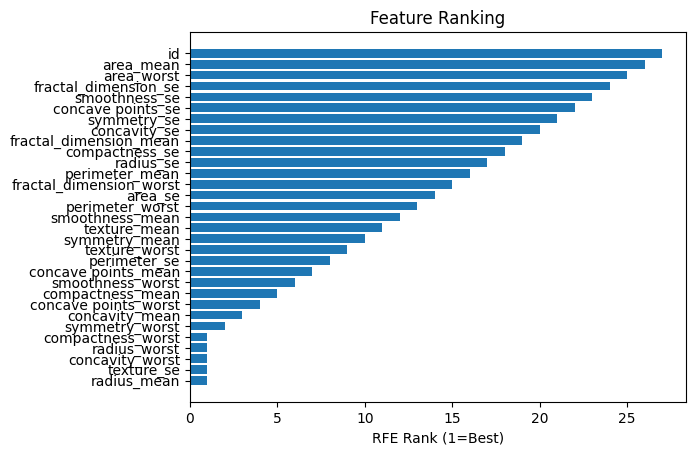

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split

# Re-split the data to ensure X_train and X_test are numerical DataFrames
# This assumes X and y (from the breast cancer dataset) are correctly loaded in previous cells.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='median')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

feature_names = X.columns # Use X.columns here as X is the original dataframe before splitting

if X_train_imp.shape[1] != len(feature_names):
    print("Column mismatch detected!")
    print("X_train shape:", X_train_imp.shape)
    print("Feature names count:", len(feature_names))
else:
    X_train = pd.DataFrame(X_train_imp, columns=feature_names)
    X_test = pd.DataFrame(X_test_imp, columns=feature_names)

    logreg = LogisticRegression(max_iter=1000)
    rfe = RFE(logreg, n_features_to_select=5)
    rfe.fit(X_train, y_train)

    selected_features = X_train.columns[rfe.support_]
    print("Top 5 Selected Features:", selected_features)

    ranking = pd.DataFrame({'Feature': X_train.columns, 'Rank': rfe.ranking_})
    ranking.sort_values('Rank', inplace=True)

    plt.barh(ranking['Feature'], ranking['Rank'])
    plt.xlabel("RFE Rank (1=Best)")
    plt.title("Feature Ranking")
    plt.show()


Part 3: Model Evaluation

Top 5 Selected Features: Index(['radius_se', 'radius_worst', 'texture_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


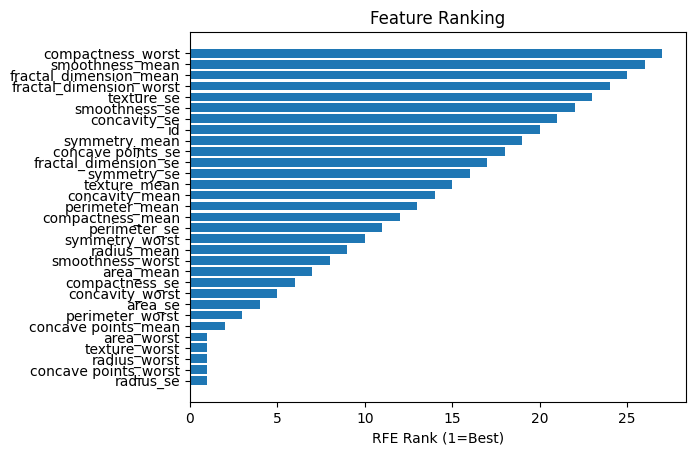

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Re-split the data to ensure X_train and X_test are numerical DataFrames
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='median')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

feature_names = X.columns # Use X.columns as 'Unnamed: 32' is now dropped from X

X_train = pd.DataFrame(X_train_imp, columns=feature_names)
X_test = pd.DataFrame(X_test_imp, columns=feature_names)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

logreg = LogisticRegression(max_iter=1000) # max_iter increased to ensure convergence
rfe = RFE(logreg, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

selected_features = X_train_scaled.columns[rfe.support_]
print("Top 5 Selected Features:", selected_features)

ranking = pd.DataFrame({'Feature': X_train_scaled.columns, 'Rank': rfe.ranking_})
ranking.sort_values('Rank', inplace=True)

plt.barh(ranking['Feature'], ranking['Rank'])
plt.xlabel("RFE Rank (1=Best)")
plt.title("Feature Ranking")
plt.show()

Part 4: Experiment

In [15]:
for n in [3, 7]:
    rfe = RFE(logreg, n_features_to_select=n)
    rfe.fit(X_train, y_train)
    selected = X_train.columns[rfe.support_]
    print(f"\nTop {n} Features:", selected.tolist())
    logreg.fit(X_train[selected], y_train)
    y_pred_n = logreg.predict(X_test[selected])
    print(f"Performance with Top {n} Features:")
    print("Accuracy:", accuracy_score(y_test, y_pred_n))
    print("F1 Score:", f1_score(y_test, y_pred_n))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Top 3 Features: ['texture_se', 'compactness_worst', 'concavity_worst']
Performance with Top 3 Features:
Accuracy: 0.8070175438596491
F1 Score: 0.6857142857142857


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Top 7 Features: ['radius_mean', 'concavity_mean', 'texture_se', 'radius_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst']
Performance with Top 7 Features:
Accuracy: 0.9736842105263158
F1 Score: 0.9647058823529412
